# 2.7.2: Glucose (In class)

In [1]:
#@title
# Import necessary libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
import pandas as pd
import numpy as np

Downloaded ModSimPy_Functions/modsim.py


In [2]:

filename = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Data/glucose_insulin.csv'
# If you are using this notebook offline, you will need to upload this data
# from the Images_and_Data folder.  Comment out the line above, and uncomment the
# line below this one, and run this cell
# filename = '../Images_and_Data/Data/glucose_insulin.csv'

data = pd.read_csv(filename, index_col='time')

In [3]:
def make_system(G0, k1, k2, k3, dt, Gb, Ib, data):
    t_0 = data.index[0]
    t_end = data.index[-1]

    I = interp1d(data.insulin.index,data.insulin.values)

    state = pd.Series(dict(G=G0, X=0),dtype=np.float64)
    system = dict(init=state,
                  k1=k1,k2=k2,
                  k3=k3,dt=dt,
                  Gb=Gb, Ib=Ib, I=I,
                  t_0=t_0, t_end=t_end)
    
    return system, state, I


In [4]:
def slope_func(t, state, system):
    G, X = state
    k1, k2, k3, dt = system['k1'],system['k2'], system['k3'], system['dt']
    I, Ib, Gb = system['I'], system['Ib'], system['Gb']
        
    dGdt = -k1 * (G - Gb) - X*G
    dXdt = k3 * (I(t) - Ib) - k2 * X
    
    return dGdt, dXdt

In [5]:
G0 = 270; k1 = 0.02; k2 = 0.02; k3 = 1.5e-05; dt = 2; Gb = 92; Ib = 11

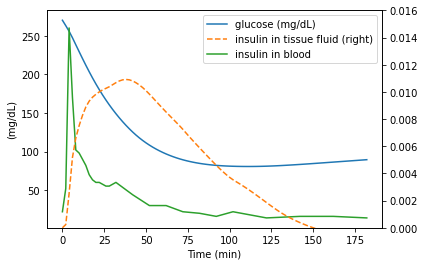

In [6]:
#@title
system, state, I = make_system(G0, k1, k2, k3, dt, Gb, Ib, data)
t_array = np.arange(system['t_0'], system['t_end']+1, system['dt'])
I_array = (I(t_array) *2.0)
I_series = pd.Series(data=I_array,index=t_array)
results, details = run_solve_ivp(system, slope_func,t_eval=t_array)

# Creates an 'axis' object that gets carried into the next plot() function
ax_second = results.plot(y='G', color='C0', 
             label='glucose (mg/dL)',ylabel='(mg/dL)', legend=True)

# Plots both the primary data 'X' and the secondary axis 'ax_second'
ax = results.plot(y='X', color='C1', secondary_y=True, ax=ax_second, 
             label='insulin in tissue fluid', xlabel='Time (min)', style='--',
               legend=True);
# Set limit of right axis
fig = ax.get_figure()
ax = fig.get_axes()
ax[1].set_ylim(0,0.016)

I_series.plot(label="insulin in blood", color='C2',legend=True);

In [7]:
G0 = 270; k1 = 0.02; k2 = 0.02; k3 = 1.5e-05; dt = 2; Gb = 92; Ib = 11

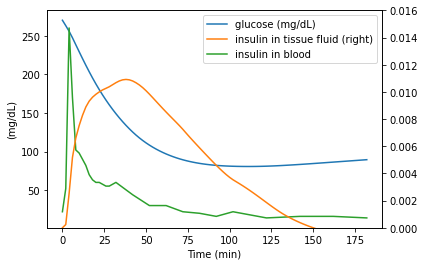

In [8]:
#@title
system, state, I = make_system(G0, k1, k2, k3, dt, Gb, Ib, data)
t_array = np.arange(system['t_0'], system['t_end']+1, system['dt'])
I_array = (I(t_array) *2.0)
I_series = pd.Series(data=I_array,index=t_array)
results, details = run_solve_ivp(system, slope_func,t_eval=t_array)

# Creates an 'axis' object that gets carried into the next plot() function
ax_second = results.plot(y='G', color='C0', 
             label='glucose (mg/dL)',ylabel='(mg/dL)', legend=True)

# Plots both the primary data 'X' and the secondary axis 'ax_second'
ax = results.plot(y='X', color='C1', secondary_y=True, ax=ax_second, 
             label='insulin in tissue fluid', xlabel='Time (min)', 
               legend=True);
# Set limit of right axis
fig = ax.get_figure()
ax = fig.get_axes()
ax[1].set_ylim(0,0.016)

I_series.plot(label="insulin in blood", color='C2',legend=True);